In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Airports

## Loading and processing data

Data comes from https://openflights.org/data.html

In [114]:
# load data
airports_raw = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header = None) #load data


# Assign column names
airports_raw.columns = ["Airport_id","Name","City","Country","3DigitId","4DigitId","Lat","Lon","Altitude_ft","Timezone","DST","TZ","Type","Source"] 

# Pick relevant columns for analysis
airports_df = airports_raw[["Airport_id","Name","City","Country","3DigitId","4DigitId","Lat","Lon","Altitude_ft","Type"]]

# Pickle the dataframe for future use
airports_df.to_pickle("airports.pkl")

In [2]:
# Loading from pickle: 
airports_df = pd.read_pickle("airports.pkl")
# Show dataset
airports_df.head()

,Airport_id,Name,City,Country,3DigitId,4DigitId,Lat,Lon,Altitude_ft,Type,Coordinates,Connected
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,airport,POINT (145.391998291 -6.081689834590001),True
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,airport,POINT (145.789001465 -5.20707988739),True
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,airport,POINT (144.2960052490234 -5.826789855957031),True
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,airport,POINT (146.725977 -6.569803),True
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,airport,POINT (147.2200012207031 -9.443380355834961),True


In [30]:
# Print basic information 
print("We have data on {} airports".format(airports_df.shape[0]))
print("The airports are situated in {} different countries".format(airports_df["Country"].nunique()))

We have data on 7543 airports
The airports are situated in 237 countries


### Producing Spatial Representation of Airports

In [44]:
import geopandas as gpd
from shapely.geometry import Point

In [115]:
airports_df["Coordinates"] = list(zip(airports_df.Lon, airports_df.Lat))
airports_df.Coordinates = airports_df.Coordinates.apply(Point)
airports_gdf = gpd.GeoDataFrame(airports_df, geometry = "Coordinates")
airports_gdf.crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

C:\Users\mra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

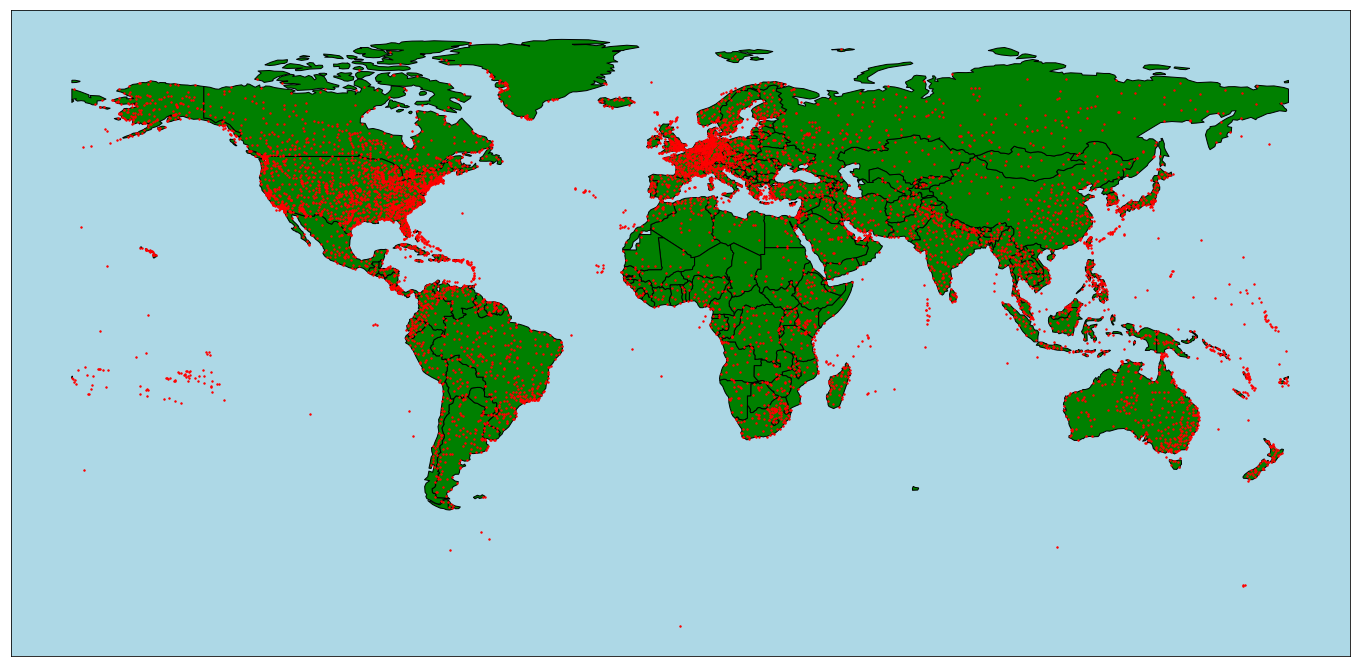

In [177]:
fig, ax = plt.subplots(figsize = (24,24))
world.plot(ax = ax, color = "green", edgecolor = "black")
airports_gdf.plot(ax = ax, color = "red", markersize = 2, marker = "o")
ax.set_facecolor("lightblue")
plt.xticks([])
plt.yticks([])
#plt.savefig(fname = "Airports_WorldMap.pdf", format = "pdf")
plt.show()

### Connections

In [3]:
connections_raw = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat', header = None)

In [4]:
connections_raw.columns = ["Airline_IATA/ICAO",
                           "Airline_ID",
                           "Source_airport","Source_airport_ID",
                           "Destination_airport","Destination_airport_ID",
                          "Codeshare",
                          "Stops",
                          "Equipment"]

In [7]:
connections_raw.head()

,Airline_IATA/ICAO,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [171]:
# Make indicator in the airports dataset, for whether the airport is included in the connections dataset
airports_gdf["Airport_id"] = airports_gdf["Airport_id"].astype(str)
connections_raw['Source_airport_ID'] = connections_raw['Source_airport_ID'].astype(str)
airports_gdf["Connected"] = airports_gdf.Airport_id.isin(list(connections_raw.Destination_airport_ID))
airports_gdf.Connected.sum()

### Plot of 'connected' airports

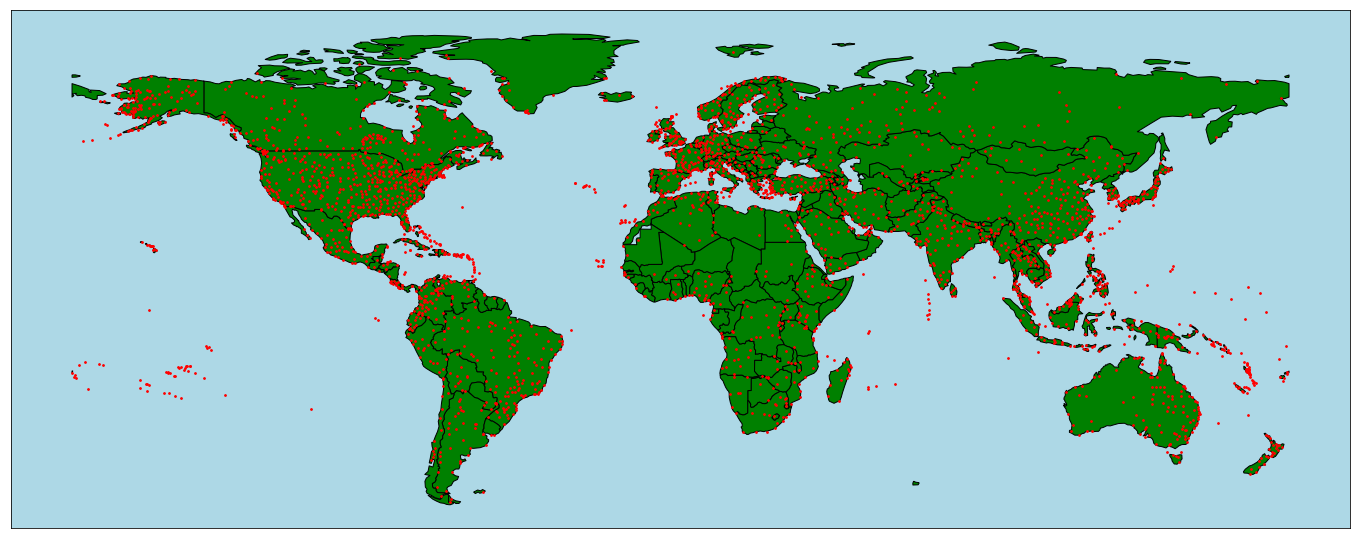

In [179]:
fig, ax = plt.subplots(figsize = (24,24))
world.plot(ax = ax, color = "green", edgecolor = "black")
airports_gdf.loc[airports_gdf.Connected == 1].plot(ax = ax, color = "red", markersize = 3, marker = "o")
ax.set_facecolor("lightblue")
plt.xticks([])
plt.yticks([])
#plt.savefig(fname = "Airports_WorldMap.pdf", format = "pdf")
plt.show()